# PS5 

## Laurence Warner lpwarner@uchicago.edu 

### 1 Multinomial log reg and cross val 

#### a 

In [215]:
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

import numpy as np

from sklearn.model_selection import LeaveOneOut

from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

from scipy.interpolate import LSQUnivariateSpline

Data preparation

In [71]:
data = pd.read_csv('data/strongdrink.txt')

In [72]:
data.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [73]:
data.describe()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.926136,13.006534,2.327159,2.367386,19.492045,99.840909,2.298920,2.043352,0.359545,1.597727,5.031761,0.961000,2.623409,748.477273
std,0.771047,0.814431,1.117747,0.275617,3.355821,14.329499,0.627333,0.995579,0.123046,0.571958,2.317965,0.227225,0.705369,316.208737
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.597500,2.210000,17.175000,88.000000,1.747500,1.242500,0.267500,1.250000,3.200000,0.790000,1.990000,500.000000
50%,2.000000,13.050000,1.845000,2.360000,19.500000,98.000000,2.380000,2.155000,0.340000,1.560000,4.640000,0.975000,2.780000,673.500000
75%,3.000000,13.682500,3.047500,2.560000,21.500000,107.250000,2.800000,2.882500,0.430000,1.952500,6.147500,1.120000,3.172500,986.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [74]:
cols = data.columns
cols

Index(['cultivar', 'alco', 'malic', 'ash', 'alk', 'magn', 'tot_phen', 'flav',
       'nonfl_phen', 'proanth', 'color_int', 'hue', 'OD280rat', 'proline'],
      dtype='object')

In [75]:
cols_to_keep = cols[[0, 1, 2, 6, 10]]
cols_to_keep

Index(['cultivar', 'alco', 'malic', 'tot_phen', 'color_int'], dtype='object')

In [76]:
log_data = data[cols_to_keep]
log_data.head()

,cultivar,alco,malic,tot_phen,color_int
0,1,14.23,1.71,2.80,5.64
1,1,13.20,1.78,2.65,4.38
2,1,13.16,2.36,2.80,5.68
3,1,14.37,1.95,3.85,7.80
4,1,13.24,2.59,2.80,4.32


In [77]:
y = log_data['cultivar']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: cultivar, dtype: int64

In [78]:
X = log_data.drop('cultivar', axis = 1 )
X.head()

,alco,malic,tot_phen,color_int
0,14.23,1.71,2.80,5.64
1,13.20,1.78,2.65,4.38
2,13.16,2.36,2.80,5.68
3,14.37,1.95,3.85,7.80
4,13.24,2.59,2.80,4.32


EDA

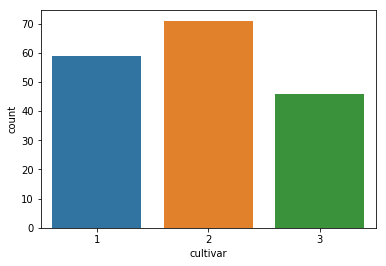

In [79]:
sns.countplot(y)

In [80]:
X.describe()

,alco,malic,tot_phen,color_int
count,176.000000,176.000000,176.000000,176.000000
mean,13.006534,2.327159,2.298920,5.031761
std,0.814431,1.117747,0.627333,2.317965
min,11.030000,0.740000,0.980000,1.280000
25%,12.362500,1.597500,1.747500,3.200000
50%,13.050000,1.845000,2.380000,4.640000
75%,13.682500,3.047500,2.800000,6.147500
max,14.830000,5.800000,3.880000,13.000000


Estimate model. Added constant column.

In [81]:
X = sm.add_constant(X)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [83]:
l = [X_train, X_test, y_train, y_test]
for data in l:
    print(data.shape)

(132, 5)
(44, 5)
(132,)
(44,)


In [84]:
mult_log_reg = LogisticRegression(multi_class= 'multinomial', solver='newton-cg')

In [85]:
mult_log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
c = mult_log_reg.coef_
c

array([[ -8.45998001e-06,   1.70038994e+00,  -2.65604001e-01,
          1.22389318e+00,   2.27585993e-02],
       [ -1.76923778e-05,  -1.46805313e+00,  -3.33053748e-01,
          6.64013944e-01,  -9.22712974e-01],
       [  2.61523578e-05,  -2.32336811e-01,   5.98657749e-01,
         -1.88790712e+00,   8.99954375e-01]])

Report coefficients

In [87]:
def print_coeffs(c, num):
    coeffs = c[num-1]
    s = "for cultivar = {}: \n beta 0 = {}, betas 1-4 = {}".format(str(num), coeffs[0], coeffs[1:5])
    print(s)

In [88]:
for i in range(1,4):
    print_coeffs(c, i)

for cultivar = 1: 
 beta 0 = -8.459980007874217e-06, betas 1-4 = [ 1.70038994 -0.265604    1.22389318  0.0227586 ]
for cultivar = 2: 
 beta 0 = -1.7692377763870782e-05, betas 1-4 = [-1.46805313 -0.33305375  0.66401394 -0.92271297]
for cultivar = 3: 
 beta 0 = 2.6152357765542685e-05, betas 1-4 = [-0.23233681  0.59865775 -1.88790712  0.89995437]


GRADER: Have I interpreted the output of coef_ correctly? Do you need constant column?

Predictions

In [89]:
y_pred = mult_log_reg.predict(X_test)

In [90]:
y_pred

array([2, 3, 1, 2, 2, 1, 3, 2, 2, 3, 1, 3, 2, 1, 1, 2, 2, 1, 1, 3, 3, 1, 2,
       1, 3, 2, 1, 3, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 3, 2, 1, 1, 2, 2])

In [91]:
y_test

111    2
175    3
46     1
112    2
91     2
72     2
140    3
107    2
125    2
160    3
47     1
163    3
120    2
62     2
13     1
92     2
87     2
28     1
51     1
153    3
159    3
44     1
124    2
34     1
132    3
77     2
45     1
136    3
80     2
103    2
68     2
109    2
150    3
100    2
12     1
55     1
1      1
67     2
172    3
64     2
20     1
21     1
59     2
104    2
Name: cultivar, dtype: int64

In [92]:
y_test[y_test != y_pred]

72    2
62    2
Name: cultivar, dtype: int64

In [93]:
s_pred = pd.Series(y_pred)
s_pred.value_counts()

2    19
1    15
3    10
dtype: int64

In [94]:
s_test = pd.Series(y_test)
s_test.value_counts()

2    21
1    13
3    10
Name: cultivar, dtype: int64

2 false predictions: predicted 1, actually 2.

In [95]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44



Precision_1 = 13/15, precision_2 = 19/19
Recall_1 = 13/13, precision_2 = 19/21

Error rates:
For cultivar = 1: 0.13
For cultivar = 2 & cultivar =3: 0

I.e. for predicting cultivar =1: 13% of Positives were False.

Best at predicting y=3 because highest f1-score (average of precision & recall)

In [96]:
y.value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

No: the most accurately predicted category is actually the value with the least observations!

#### b 

Change to numpy arrays

In [97]:
X_vals = X.values

In [98]:
y_vals = y.values

In [99]:
loo = LeaveOneOut()

In [100]:
loo.get_n_splits(X_vals)

176

In [117]:
SE_vec = np.zeros(len(X_vals))

In [124]:
def SE(y_test, y_pred):
    '''
    GRADER: Is there a better way of doing an indicator function?
    '''
    if y_test == y_pred:
        return 0
    else:
        return 1

In [125]:
for train_index, test_index in loo.split(X):

    X_train, X_test = X_vals[train_index], X_vals[test_index]
    y_train, y_test = y_vals[train_index], y_vals[test_index]
    
    mult_log_reg = LogisticRegression(multi_class= 'multinomial', solver='newton-cg')
    mult_log_reg.fit(X_train, y_train)
    y_pred = mult_log_reg.predict(X_test)
    
    SE_vec[test_index] = SE(y_test, y_pred)

MSE = SE_vec.mean()

In [127]:
print("Mean squared error is", MSE)

Mean squared error is 0.0795454545455


GRADER: Are we really supposed to report classication reports for 176 different training sets?
What were we supposed to do?

#### c 

In [130]:
kf = KFold(n_splits=3, shuffle=True, random_state=10)
kf.get_n_splits(X_vals)

3

In [154]:
SE_vec = np.zeros(3)
SE_vec.shape

(3,)

In [146]:
def SE_fold(y_test, y_pred):
    '''
    Sums squared errors for given fold.
    '''
    count = 0 
    for i in range(len(y_pred)):
        if y_pred[i] != y_test[i]:
            count += 1
    return count

In [157]:
k_ind = 0 

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X_vals[train_index], X_vals[test_index]
    y_train, y_test = y_vals[train_index], y_vals[test_index]
    
    mult_log_reg = LogisticRegression(multi_class= 'multinomial', solver='newton-cg')
    mult_log_reg.fit(X_train, y_train)
    y_pred = mult_log_reg.predict(X_test)
    
    SE_vec[k_ind] = SE_fold(y_test, y_pred)
    
    k_ind += 1
    
MSE = SE_vec.mean()

In [159]:
SE_vec

array([ 7.,  6.,  4.])

7, 6 and 4 errors, versus 2 on the original split

In [158]:
MSE

5.666666666666667

### 2 

#### a 

In [161]:
cool_data = pd.read_csv('data/CoolIndex.txt', names = ['age', 'cool'])

In [163]:
cool_data.head()

,age,cool
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


In [164]:
cool_data.describe()

,age,cool
count,956.000000,956.000000
mean,44.385983,32.790118
std,20.250954,9.246635
min,11.000000,7.942515
25%,27.000000,29.219091
50%,44.000000,33.721898
75%,60.000000,37.453531
max,95.000000,63.649347


GRADER: Are these really high school students?! They go up to 95?!
EDIT: Realised it is the high school students doing the ranking!

In [166]:
age = cool_data['age']
cool = cool_data['cool']

Text(0.5,1,'Age and Coolness')

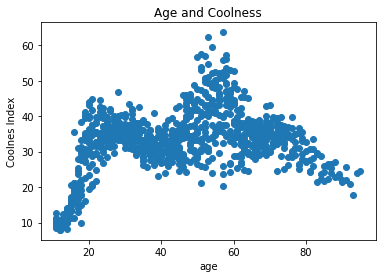

In [172]:
plt.scatter(x = age, y = cool)
plt.xlabel('age')
plt.ylabel('Coolnes Index')
plt.title('Age and Coolness')

In [178]:
age < 22

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
943    False
944    False
945    False
946    False
947    False
948    False
949    False
950    False
951    False
952    False
953    False
954    False
955    False
Name: age, Length: 956, dtype: bool

Converting from Boolean to integer.

In [173]:
age_bin1 = (age < 22).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = (age >= 77).astype(int)

In [174]:
X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))

In [196]:
X_step.loc[0]

age_bin1    1
age_bin2    0
age_bin3    0
age_bin4    0
age_bin5    0
Name: 0, dtype: int64

In [176]:
X_step.describe()

,age_bin1,age_bin2,age_bin3,age_bin4,age_bin5
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,0.162134,0.276151,0.285565,0.217573,0.058577
std,0.368767,0.447326,0.451919,0.412812,0.234955
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
reg2 = sm.OLS(endog=cool, exog=X_step, missing='drop')
reg2_results = reg2.fit()
print(reg2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cool   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 19 Feb 2018   Prob (F-statistic):          3.73e-114
Time:                        12:05:14   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.562     35.746      0.0

In [188]:
reg2_results.params

age_bin1    20.102457
age_bin2    34.475788
age_bin3    37.635105
age_bin4    35.225400
age_bin5    27.296378
dtype: float64

In [193]:
X_EX = [0,0,0,1,0]
reg2_results.predict(X_EX)

array([ 35.22540004])

Predicted coolness for 73 year-old just the coefficient on his age category (because no constant coefficient!)

In [197]:
plt.plot?

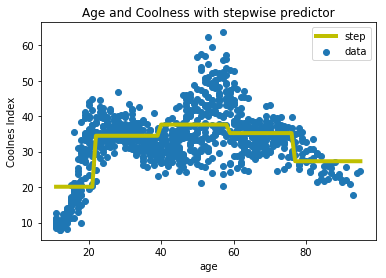

In [208]:
plt.scatter(x = age, y = cool, label = 'data')
plt.plot(age, reg2_results.predict(X_step), color = 'y', linewidth = 4, label = 'step')
plt.xlabel('age')
plt.ylabel('Coolnes Index')
plt.title('Age and Coolness with stepwise predictor')
plt.legend()

#### b 

In [229]:
LSQUnivariateSpline?

In [230]:
knots = [22, 40, 59, 77]

In [231]:
spline = LSQUnivariateSpline(x = age.values, y = cool.values, t = knots, k=1)

In [232]:
pred = spline(73)
pred

array(32.536832389143306)

73 y/o has predicted coolness of 33

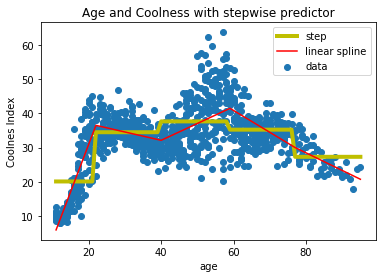

In [233]:
plt.scatter(x = age, y = cool, label = 'data')
plt.plot(age, reg2_results.predict(X_step), color = 'y', linewidth = 4, label = 'step')
plt.plot(age, spline(age), color = 'r', label = 'linear spline')
plt.xlabel('age')
plt.ylabel('Coolnes Index')
plt.title('Age and Coolness with stepwise predictor')
plt.legend()

#### c 

Cubic spline. 

In [234]:
cub_spline = LSQUnivariateSpline(x = age.values, y = cool.values, t = knots, k=3)

In [235]:
pred = cub_spline(73)
pred

array(31.262429389257864)

Predicted to be slightly less cool: 31.

AttributeError: module 'matplotlib.pyplot' has no attribute 'ybar'

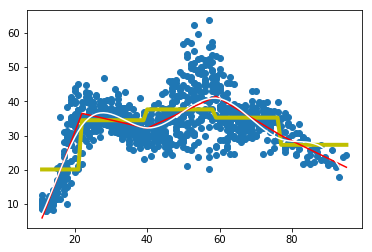

In [242]:
plt.scatter(x = age, y = cool, label = 'data')
plt.plot(age, reg2_results.predict(X_step), color = 'y', linewidth = 4, label = 'step')
plt.plot(age, spline(age), color = 'r', label = 'linear spline')
plt.plot(age, cub_spline(age), color = 'white', label = 'cubic spline')
plt.ybar(73)
plt.xlabel('age')
plt.ylabel('Coolnes Index')
plt.title('Age and Coolness with stepwise predictor')
plt.legend()